/home/caleb/src/VectorModel/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Plot saved to heatmap_experiments/T=0.0000_R=0.7143.jpg
Plot saved to heatmap_experiments/T=0.0000_R=0.5714.jpg
Plot saved to heatmap_experiments/T=0.0000_R=0.2857.jpg
Plot saved to heatmap_experiments/T=0.0000_R=0.2143.jpg
Plot saved to heatmap_experiments/T=0.0000_R=1.0000.jpg
Plot saved to heatmap_experiments/T=0.0000_R=0.7857.jpg
Plot saved to heatmap_experiments/T=0.0000_R=0.4286.jpg
Plot saved to heatmap_experiments/T=0.0000_R=0.6429.jpg
Plot saved to heatmap_experiments/T=0.0000_R=0.3571.jpg
Plot saved to heatmap_experiments/T=0.0714_R=1.0000.jpg
Plot saved to heatmap_experiments/T=0.0000_R=0.8571.jpg
Plot saved to heatmap_experiments/T=0.0000_R=0.9286.jpg
Plot saved to heatmap_experiments/T=0.0714_R=0.7857.jpg
Plot saved to heatmap_experiments/T=0.0000_R=0.0000.jpg
Plot saved to heatmap_experiments/T=0.0000_R=0.5000.jpg
Plot saved to heatmap_experiments/T=0.0714_R=0.6429.jpg
Plot saved to heatmap_experiments/T=0.0714_R=0.7143.jpg
Plot saved to heatmap_experiments/T=0.0714_R=0.9

(<Figure size 1400x500 with 4 Axes>,
 array([<Axes: title={'center': 'Bipolarization'}, xlabel='Epsilon T', ylabel='Epsilon R'>,
        <Axes: title={'center': 'Shannon Entropy'}, xlabel='Epsilon T', ylabel='Epsilon R'>],
       dtype=object))

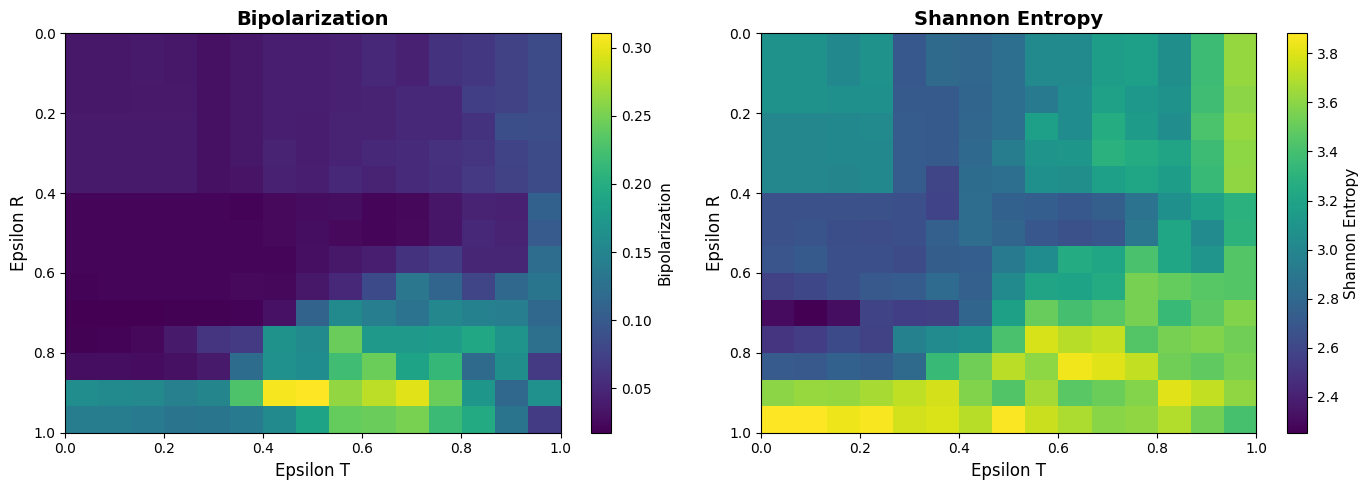

In [1]:
from concurrent.futures import ProcessPoolExecutor, as_completed
from vector_model import *
from analysis import *
from model_runner import run_model
import numpy as np

n_epsilons = 15

epsilon_t_start = 0.0
epsilon_t_end = 1.0
epsilon_r_start = 1.0
epsilon_r_end = 0.0

epsilons_t = np.linspace(epsilon_t_start, epsilon_t_end, n_epsilons)
epsilons_r = np.linspace(epsilon_r_start, epsilon_r_end, n_epsilons)

def get_base_params():
    return {
        'AGENT_TYPE': 'test',
        'N_DIMS': 4,
        'N_DYN_VECS': 3,
        'N_PERS_VECS': 1,
        'N_STATIC_TOPICS': 1,
        'N_DYNAMIC_TOPICS': 10,
        'TOPIC_DECAY_RATE': 0.95,
        'TOPIC_REPLACE_THRESHOLD': 0.1,
        'N_AGENTS': 50,
        'OPINION_ASSIMILATIVE_METHOD': 'closest',
        'VECTOR_ASSIMILATIVE_METHOD': 'closest',
        'OPINION_REPULSIVE_METHOD': 'furthest',
        'VECTOR_REPULSTIVE_METHOD': 'furthest',
        'EPSILON_T_OP': 0.0,
        'EPSILON_R_OP': 0.0,
        'EPSILON_T_VEC': 0.0,
        'EPSILON_R_VEC': 0.0,
        'LAMBDA_PARAM': 0.1,
        'MESSAGE_RATE': 1.0,
        'MAX_TARGETS': 1,
        'INCLUDE_OPINIONS': True,
        'INCLUDE_DYN_VECS': True,
        'INCLUDE_PERS_VECS': True,
        'N_STEPS': 200,
        'SIMILARITY_METHOD': 'tanh',
        'SELECTOR_METHODS': ['select_randomly'],
        'MAX_MESSAGES_SELECTED': 10,
        'OPINION_SIMILARITY_THRESHOLD': 0.4,
        'VECTOR_SIMILARITY_THRESHOLD': 0.4,
        'N_MAX_MESSAGES': 1,
        'PRODUCER_METHODS': ['random_targets'],
        'SEED': 0,
    }
    
bipolarization_results = np.zeros((n_epsilons, n_epsilons))
entropy_results = np.zeros((n_epsilons, n_epsilons))

future_to_index = {}

with ProcessPoolExecutor(max_workers=12) as executor:
    for i, epsilon_t in enumerate(epsilons_t):
        for j, epsilon_r in enumerate(epsilons_r):
            params = get_base_params()
            
            params['DATA_COLLECTOR'] = DataCollector('none', n_agents_to_track=1, n_messages_to_show=3)
            params['EPSILON_T_OP'] = epsilon_t
            params['EPSILON_R_OP'] = epsilon_r
            params['EPSILON_T_VEC'] = epsilon_t
            params['EPSILON_R_VEC'] = epsilon_r
            
            params['run_name'] = f'T={epsilon_t:.4f}_R={epsilon_r:.4f}'

            future = executor.submit(run_model, params, output_dir='heatmap_experiments', show_plot=False)

            future_to_index[future] = (i, j)

    for future in as_completed(future_to_index):
        i, j = future_to_index[future]
        result = future.result()

        if 'bipolarization' not in result.keys() or 'shannon_entropy' not in result.keys():
            continue
        else:
            bipolarization_results[i,j] = result['bipolarization']
            entropy_results[i,j] = result['shannon_entropy']
        
        del result

plot_bipolarization_entropy_heatmaps(bipolarization_results, entropy_results, (0.0, 1.0), (1.0, 0.0), 'Epsilon T', 'Epsilon R')